In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [2]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(type(digits.data))
print(digits.data.shape)

<class 'numpy.ndarray'>
(1797, 64)


In [5]:
print(type(digits.data[0]))
print(digits.data[0].shape)
print(digits.data[0])

<class 'numpy.ndarray'>
(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


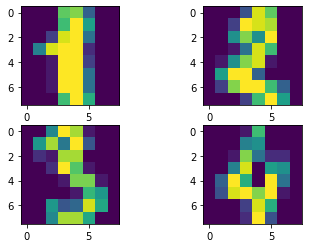

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1, 5):
    plt.subplot(2,2, i)
    plt.imshow(digits.data[i].reshape(8, 8))
plt.show()

In [7]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [8]:
import math
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size= 0.25 )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [9]:
# Train a SVM classification model
from time import time
print("Fitting the classifier to the training set")
t0 = time()

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

#clf = SVC(C= 1, gamma = 0.1, verbose=True, kernel='rbf')
#Tuning: Model selection
param_grid = {
               'C': [1e-3, 1e-2, 1, 1e2, 1e3],
              'gamma': [0.0001, 0.001, 0.1, 1], 
               'kernel': ['linear', 'rbf'],
             }

clf = GridSearchCV( SVC(), param_grid)
clf.fit(X_train, y_train)

print("done in %0.3fs" , (time() - t0))

Fitting the classifier to the training set
done in %0.3fs 8.623350143432617


In [10]:
print(clf.score(X_test, y_test))
print("Best parameters selected from Grid search", clf.best_params_)

0.9911111111111112
Best parameters selected from Grid search {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}


In [11]:
print("Indices of support vectors", clf.best_estimator_.support_.shape)
print("Dual coeffecients", clf.best_estimator_.dual_coef_.shape)

Indices of support vectors (672,)
Dual coeffecients (9, 672)


In [12]:
print("Number of support vectors per each class:", clf.best_estimator_.n_support_ )
print("\nIndices of support vectors", clf.best_estimator_.support_)
print("\nDual coeffecients", clf.best_estimator_.dual_coef_[0])

Number of support vectors per each class: [38 78 61 71 67 66 50 70 89 82]

Indices of support vectors [  12   53  131  146  184  185  221  311  344  355  393  500  505  512
  530  640  651  673  681  719  743  746  776  796  822  919  928  938
  939  942  999 1026 1165 1188 1206 1219 1269 1333    2   75   76  108
  112  116  147  179  183  207  211  220  223  227  262  266  267  279
  288  297  303  307  312  346  349  388  395  449  459  489  490  496
  499  504  571  646  686  698  702  703  718  731  736  740  782  828
  835  870  880  886  918  935  944  961  989  990 1006 1019 1027 1055
 1065 1067 1090 1112 1119 1124 1159 1173 1193 1236 1250 1253 1264 1292
 1295 1316 1320 1334   13   25   63  181  195  209  240  261  277  323
  324  364  373  412  433  461  466  468  478  480  484  493  579  596
  600  610  633  654  678  693  730  767  772  775  780  824  826  836
  839  883  884  929  958  992 1020 1024 1054 1059 1073 1078 1101 1133
 1194 1195 1215 1231 1277 1314 1327 1336 1340 

In [13]:
clf.cv_results_ 

{'mean_fit_time': array([0.01477795, 0.06567502, 0.0077621 , 0.07477717, 0.01606207,
        0.06470909, 0.01521993, 0.1150526 , 0.01250744, 0.07181625,
        0.01260567, 0.06625147, 0.00801501, 0.07406278, 0.0043345 ,
        0.10406852, 0.0102941 , 0.02206502, 0.01157694, 0.02632251,
        0.00947852, 0.08176498, 0.01099286, 0.11524401, 0.00662341,
        0.00985193, 0.00977635, 0.02475438, 0.00945354, 0.08789077,
        0.00945387, 0.11556273]),
 'std_fit_time': array([0.00434574, 0.00698574, 0.00699075, 0.00847793, 0.00482718,
        0.00721234, 0.00279362, 0.00410268, 0.00625374, 0.00648459,
        0.00630528, 0.00417127, 0.00678825, 0.00602187, 0.00611117,
        0.00794285, 0.0067036 , 0.00788524, 0.00622686, 0.00579785,
        0.00794175, 0.00624702, 0.00623329, 0.0050721 , 0.00609747,
        0.00627832, 0.00801585, 0.0074845 , 0.00772005, 0.00765427,
        0.00799862, 0.00700927]),
 'mean_score_time': array([0.        , 0.02592683, 0.00797062, 0.01761022, 0.000791

In [14]:
from sklearn import neighbors, linear_model
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=7000,
                                           multi_class='multinomial', verbose=2)

t0 = time()
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))
print("done in %0.3fs" , (time() - t0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression score: 0.955556
done in %0.3fs 2.1793177127838135


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


In [15]:
help(clf)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either e

In [17]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
print(type(breast_cancer_data))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
#Tuning: Model selection
param_grid = {
               'C': [1e-3, 1e-2, 1, 1e2, 1e3],
              'gamma': [0.0001, 0.001, 0.1, 1], 
               'kernel': ['linear', 'rbf'],
             }

clf1 = GridSearchCV( SVC(), param_grid)
clf1.fit(X_train, y_train)

<class 'sklearn.utils.Bunch'>
(398, 30) (398,) (171, 30) (171,)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 100.0, 1000.0],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [22]:
print("Indices shape of support vectors", clf1.best_estimator_.support_.shape)
print("Dual coeffecients", clf1.best_estimator_.dual_coef_.shape)
print("Number of support vectors per each class:", clf1.best_estimator_.n_support_ )

Indices shape of support vectors (32,)
Dual coeffecients (1, 32)
Number of support vectors per each class: [17 15]


In [20]:
print("\nIndices of support vectors", clf1.best_estimator_.support_)
print("\nDual coeffecients", clf1.best_estimator_.dual_coef_[0])


Indices of support vectors [ 21  89  95  96 136 149 159 167 194 201 241 249 284 346 366 384 396  54
 141 146 154 155 174 240 244 257 266 308 309 340 376 391]

Dual coeffecients [-100.         -100.          -10.03456576 -100.         -100.
 -100.         -100.          -50.73995457  -10.67618679 -100.
   -1.60520427 -100.          -11.9827846  -100.          -81.30596273
  -50.02252599 -100.          100.          100.           44.78607009
  100.          100.            9.98173968  100.           45.60132648
  100.          100.          100.          100.           15.99804845
  100.          100.        ]


In [23]:
clf1.best_estimator_.dual_coef_[0].sum()

1.3955059330328368e-11

In [26]:
print("\nCoeffecients", clf1.best_estimator_.coef_.shape)
print("\nCoeffecients", clf1.best_estimator_.coef_[0])
print("\nBias Coeffecient", clf1.best_estimator_.coef0)


Coeffecients (1, 30)

Coeffecients [ 1.95460067e+01  4.73604472e+00 -3.47572993e+00  3.19151432e-02
 -1.19059097e+01 -4.57890381e+00 -2.06759918e+01 -2.14973329e+01
 -1.56807546e+01 -2.07670430e-01 -6.32230788e-01  2.61106577e+01
  1.80905461e+01 -2.57548398e+00 -2.40516005e+00  3.77375719e+00
  7.74884703e-02 -3.65337142e+00 -3.44302896e+00  5.71447173e-01
  2.87039596e+00 -6.58107152e+00 -1.03763074e+00  5.38692445e-02
 -1.82033227e+01  1.89074431e+01 -2.32645437e+01 -3.53329163e+01
 -2.84736384e+01  4.55082294e-01]

Bias Coeffecient 0.0


In [27]:
clf1.cv_results_

{'mean_fit_time': array([1.88078880e-03, 4.26893234e-03, 2.14557648e-03, 4.68382835e-03,
        0.00000000e+00, 5.64951897e-03, 2.00390816e-03, 5.21998405e-03,
        7.39235878e-03, 2.26073265e-03, 7.91015625e-03, 3.59902382e-03,
        6.39934540e-03, 5.53874969e-03, 6.00643158e-03, 5.59906960e-03,
        3.37525129e-01, 1.73482895e-03, 3.36556244e-01, 5.83481789e-03,
        3.37256479e-01, 9.47785378e-03, 3.38104820e-01, 6.25042915e-03,
        3.27417355e+00, 0.00000000e+00, 3.33741689e+00, 2.61473656e-03,
        3.35169544e+00, 3.12523842e-03, 3.32543736e+00, 8.25505257e-03,
        3.31204877e+00, 2.14076042e-03, 3.34688802e+00, 5.16195297e-03,
        3.35064244e+00, 8.26721191e-03, 3.35042300e+00, 6.34064674e-03]),
 'std_fit_time': array([1.92115294e-03, 5.69598171e-03, 2.70298347e-04, 5.74356240e-03,
        0.00000000e+00, 6.98653904e-03, 2.70127303e-05, 3.73613078e-04,
        7.81995807e-03, 1.20243146e-03, 5.19905341e-03, 4.80481753e-04,
        2.24640890e-03, 5.111

In [ ]:
#Exercises
# 1. Run SVM on wines dataset and find the best parameters using Gridserach (try acccuracy upto 99%)
# try with various C values
# try with various kernels(linear, poly, rbf) and gamma parameters

# 2. Run SVM on iris data set and find the best parameters using Grid serach (try acccuracy upto 99%)

# 3. Run SVM on breast_cancer dataset using Grdiserach
# before running please select best K features using sklearn.feature_selection.SelectKBest()
# or select features using forward/backward using sklearn.feature_selection.SequentialFeatureSelector()